In [7]:
## Regular EDA and plotting Libararies
import numpy as np # numerical operation
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
%matplotlib inline

## Machine learning models
from sklearn.linear_model import LogisticRegression # binary classification
from sklearn.neighbors import KNeighborsClassifier # prediction classification 
from sklearn.ensemble import RandomForestClassifier # prediction classification

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## 1. Data 

In [116]:
df = pd.read_csv("heart-disease.csv")
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Heart Disease Data Dictionary
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/d
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg - resting electrocardiographic results
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
12. ca - number of major vessels (0-3) colored by flourosop
13. thal - thalium stress result
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [48]:
## df.target.value_counts()
df.target.value_counts(normalize=True)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

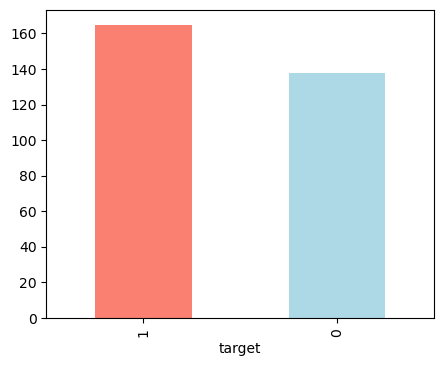

In [76]:
df.target.value_counts().plot(kind='bar' , figsize=(5,4), color =['salmon', 'lightblue']);

In [50]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [52]:
# 1 = male, 0 = female
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

#### Gender vs Target

In [53]:

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


1. female has 75% chance of heart disease
2. male has 50% chance of heart disease
3. 62.5% chance of getting heart disease

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

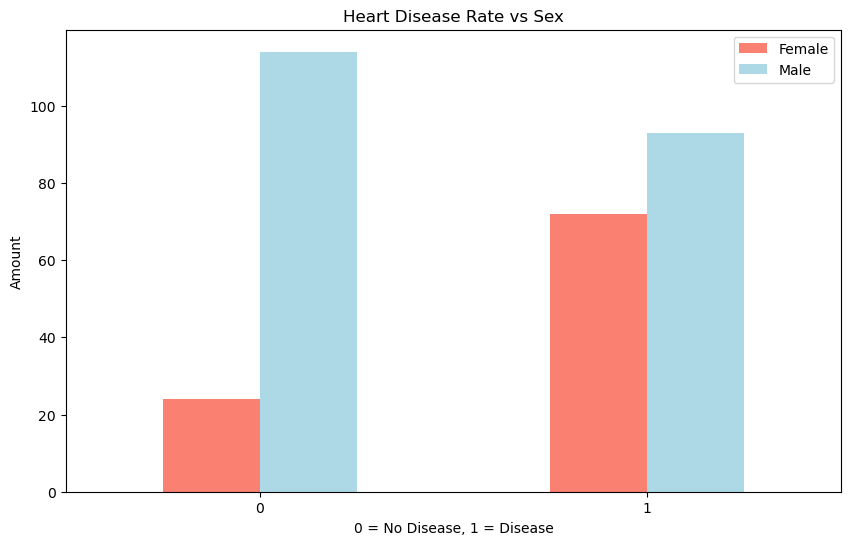

In [70]:
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize =(10,6), color = ['salmon', 'lightblue']);

plt.title('Heart Disease Rate vs Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)

#### Age vs Max Heart rate for Heart Disease

Text(0, 0.5, 'Max Heart Rate')

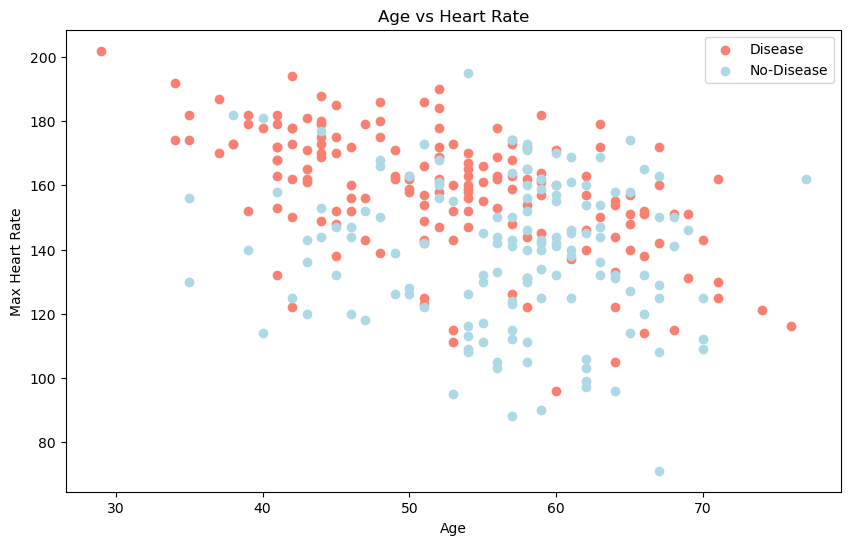

In [91]:
plt.figure(figsize=(10,6))

# with heart disease
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color = 'salmon')

# no heart disease
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color = 'lightblue')

plt.title('Age vs Heart Rate')
plt.xlabel('Age')
plt.legend(['Disease', 'No-Disease'])
plt.ylabel('Max Heart Rate')

1. Age is proportional to the heart rate, while heart rate inversely proportional to age.
2. Heart rate betweenn 150 - 200 are more susceptible of heart disease

<Axes: ylabel='Frequency'>

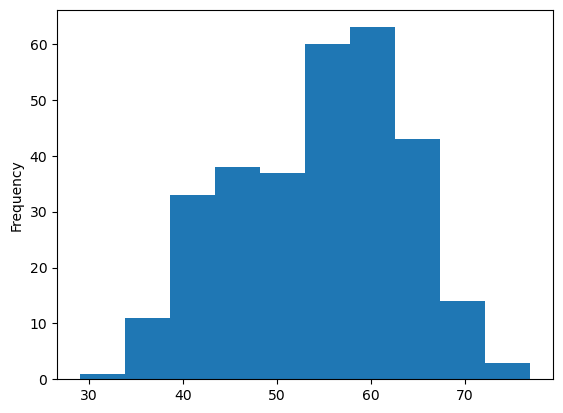

In [93]:
df.age.plot.hist()

1. Normal distribution,but slightly weigt on the right.

#### Heart Disease Frequency vs Chest Pain

In [95]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

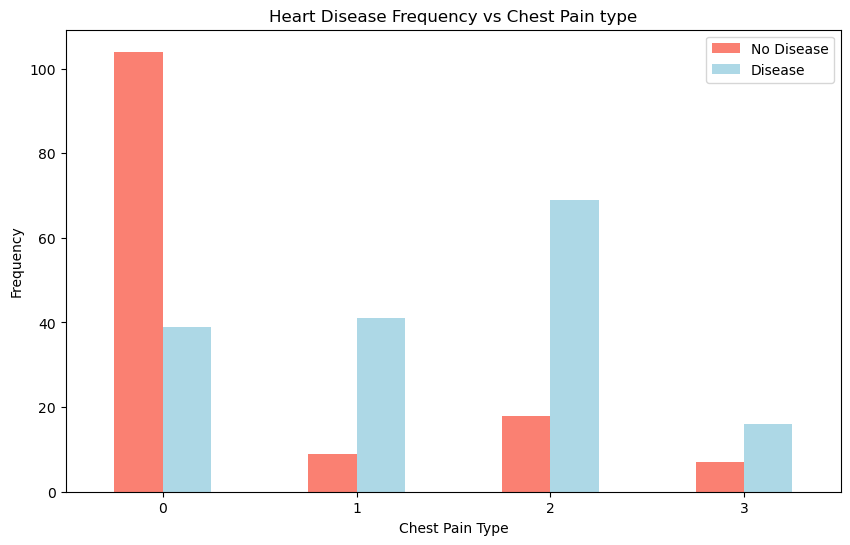

In [105]:
pd.crosstab(df.cp, df.target).plot(kind='bar',figsize = (10,6), color = ['salmon', 'lightblue'])

plt.title('Heart Disease Frequency vs Chest Pain type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation = 0)

1. 0: Typical angina: chest pain related decrease blood supply to the heart
2. 1: Atypical angina: chest pain not related to heart
3. 2: Non-anginal pain: typically esophageal spasms (non heart related)
4. 3: Asymptomatic: chest pain not showing signs of disease

#### Correlation Analysis

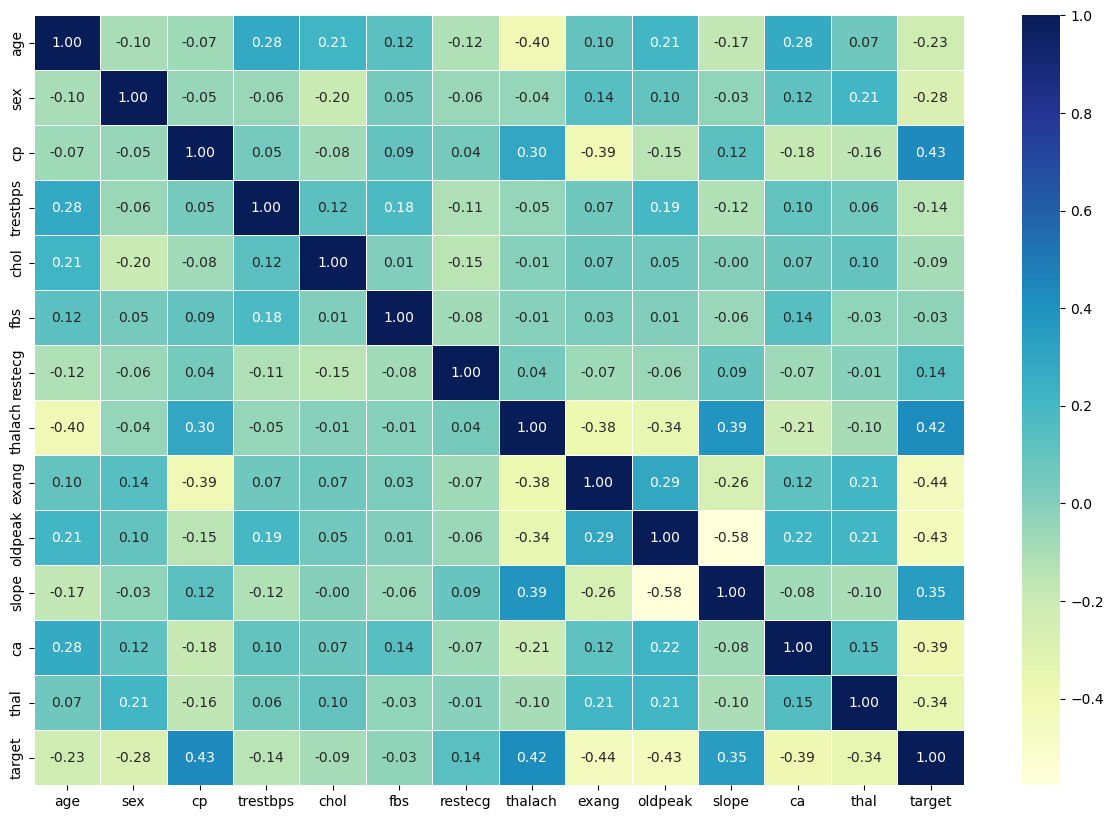

In [108]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt= ".2f", cmap="YlGnBu");

### Heart Disease Data Dictionary
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/d
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg - resting electrocardiographic results
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
12. ca - number of major vessels (0-3) colored by flourosop
13. thal - thalium stress result
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## 2. Modeling

#### Problem
    Given clinical parameters about a patient, can we predict whether or not they have heart disease?

In [117]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [125]:
X = df.drop('target', axis = 1) # remove the target values
y = df.target.values # storing the target values

In [123]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### Training and Test Split

In [127]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # 20% of the data use as test set

In [129]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [134]:
y_train,len(y_train)

(array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
       dtype=int64),
 242)

242 samples to train on

In [138]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [141]:
len(X_test)

61

61 samples to test our models

### Model Selection

1. Logistic Regression
2. K-Nearest Neighbors
3. RandomForest

Choosing the right estimator:
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [153]:
# Put models in a dictionay
classifier = {'KNN': KNeighborsClassifier(),
              'Logistic Regression': LogisticRegression(),
              'Random Forest': RandomForestClassifier()
              }

def fit_and_score(classifier, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    
    np.random.seed(42)
    model_scores = {}
    
    # looping through the models
    for name, model in classifier.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


In [156]:
model_scores = fit_and_score(classifier = classifier,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)

model_scores

C:\Users\MSI\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

### Model Comparison

(array([0, 1, 2]),
 [Text(0, 0, 'KNN'),
  Text(1, 0, 'Logistic Regression'),
  Text(2, 0, 'Random Forest')])

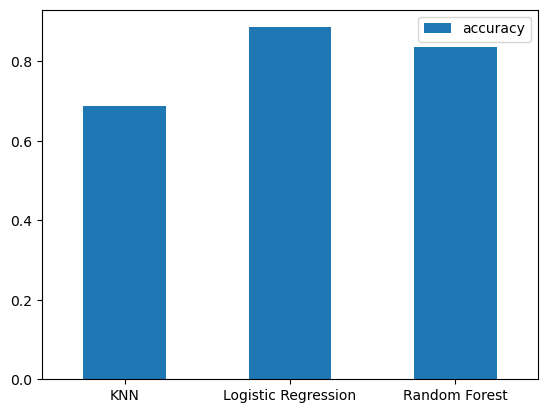

In [159]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()
plt.xticks(rotation = 0)

### 1. Hyper parameter tuning (KNN)

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [168]:
# default value for n_neighbors = 5
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 75.41%


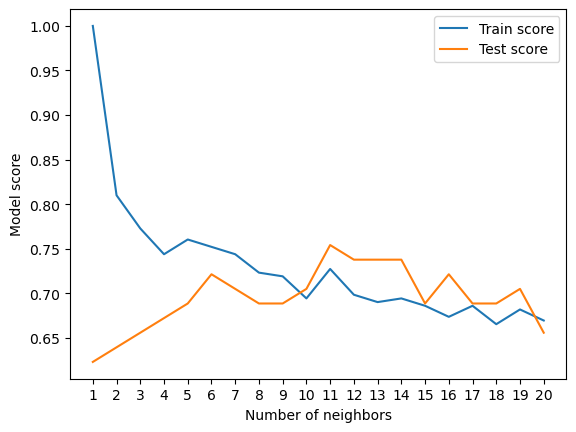

In [167]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyper Parameter Tuning using RandomizedSearchCV

#### A. Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [174]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [175]:
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [176]:
# best parameters for Logistic Regression
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [205]:
# Test Score
rs_log_reg.score(X_test, y_test)

0.8852459016393442

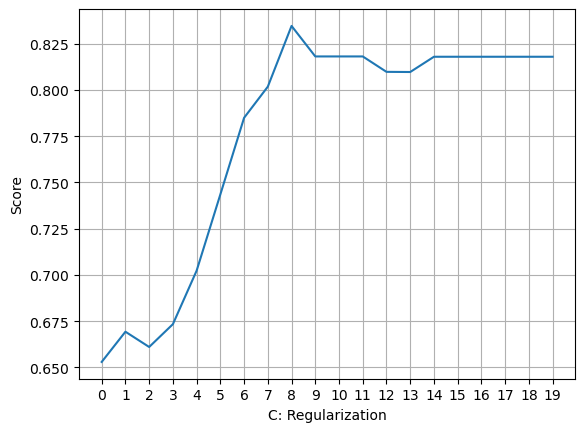

In [217]:
# Extracting the hyperparameter combinations
logisticReg = range(len(scores))

# Plotting a line chart of scores
plt.plot(logisticReg, scores)
plt.xticks(np.arange(0, len(scores), 1))
plt.xlabel('C: Regularization')
plt.ylabel('Score')
plt.grid(True)
plt.show()

#### B. Random Forest Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [188]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [220]:
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [221]:
# best parameters for Random Forest Classifier
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [222]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.8688524590163934

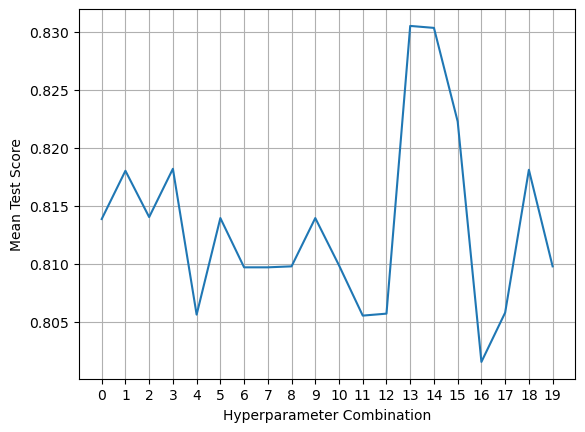

In [225]:
# Extracting the hyperparameter combinations
random_forest = range(len(rs_rf.cv_results_['mean_test_score']))

# Plotting a line chart of scores
plt.plot(random_forest, rs_rf.cv_results_['mean_test_score'])
plt.xticks(np.arange(0, len(random_forest), 1))
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show()

#### C. K-Nieghbors Classifier

In [194]:
# Create a list of different values for n_neighbors
neighbors = range(1, 21)  # 1 to 20

# Define hyperparameters to search
param_grid = {'n_neighbors': neighbors}

In [203]:
# Setup random hyperparameter search for RandomForestClassifier
kn_rf = RandomizedSearchCV(KNeighborsClassifier(), 
                           param_distributions=param_grid, 
                           n_iter=10, 
                           cv=5, 
                           verbose=True)
# Fit random hyperparameter search model
kn_rf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [199]:
# best parameters for Random Forest Classifier
kn_rf.best_params_

{'n_neighbors': 3}

In [201]:
# Evaluate the randomized search random forest model
kn_rf.score(X_test, y_test)

0.6557377049180327